<a href="https://colab.research.google.com/github/Ranim-Mattoussi/DL-Breast-Cancer-Classification-with-NN/blob/main/Matoussi_Ranim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/immobilier.csv")

In [ ]:
data.head()

,surface,chambres,salles_de_bain,quartier,annee_construction,prix
0,152,1,3,C,2001,361497
1,229,3,1,B,2019,689421
2,142,5,2,C,2004,821818
3,64,2,2,A,1982,479747
4,156,1,3,D,2011,258598


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   surface             1000 non-null   int64 
 1   chambres            1000 non-null   int64 
 2   salles_de_bain      1000 non-null   int64 
 3   quartier            1000 non-null   object
 4   annee_construction  1000 non-null   int64 
 5   prix                1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [ ]:
# Importation des bibliothèques nécessaires pour la visualisation et la détection des valeurs aberrantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour traiter les valeurs aberrantes à l'aide de l'IQR
def traiter_valeurs_aberrantes(df, colonnes):
    for col in colonnes:
        # Calcul des quartiles (Q1 et Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Définition des limites inférieure et supérieure pour considérer les valeurs aberrantes
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Filtrage des données en excluant les valeurs aberrantes
        df = df[(df[col] >= limite_inf) & (df[col] <= limite_sup)]

    return df

# Application de la fonction pour traiter les valeurs aberrantes sur les colonnes numériques
colonnes_numeriques = ['surface', 'chambres', 'salles_de_bain', 'annee_construction', 'prix']

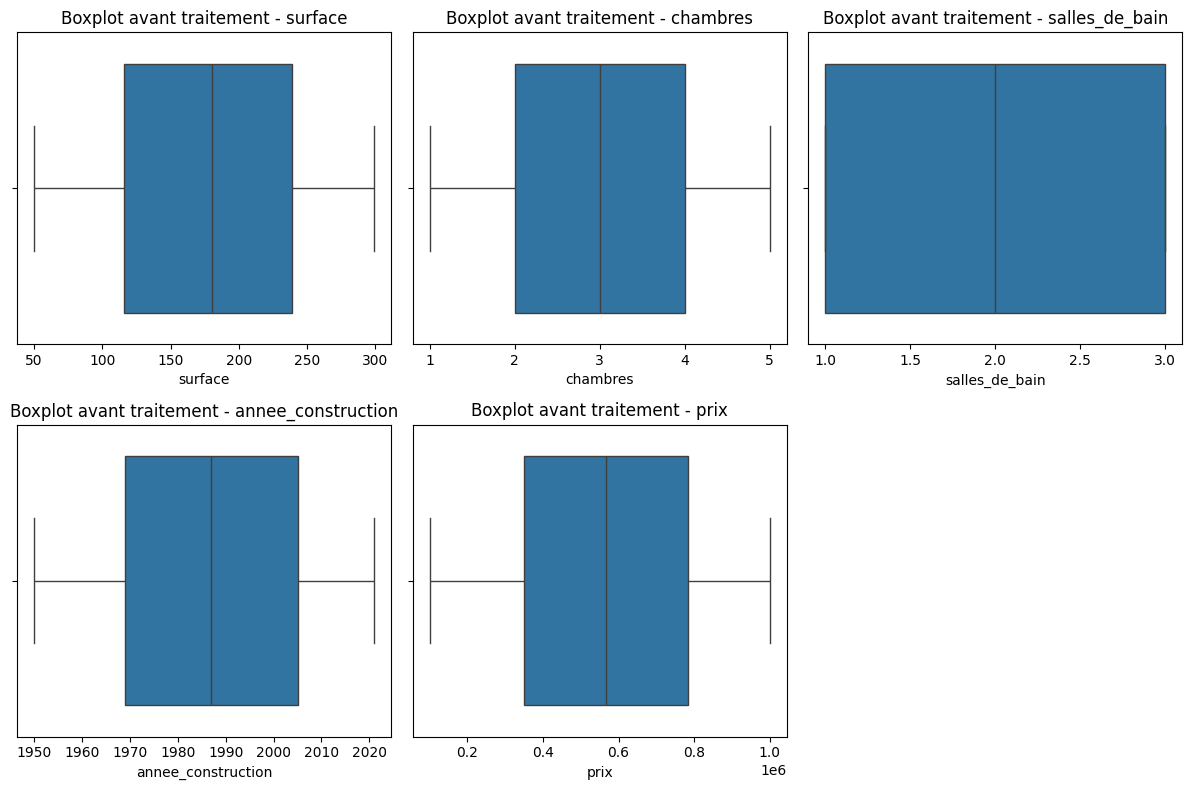

In [ ]:
# Visualisation avant le traitement des valeurs aberrantes (boxplots)
plt.figure(figsize=(12, 8))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(2, 3, i)  # Sous-graphique
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot avant traitement - {col}')
plt.tight_layout()
plt.show()

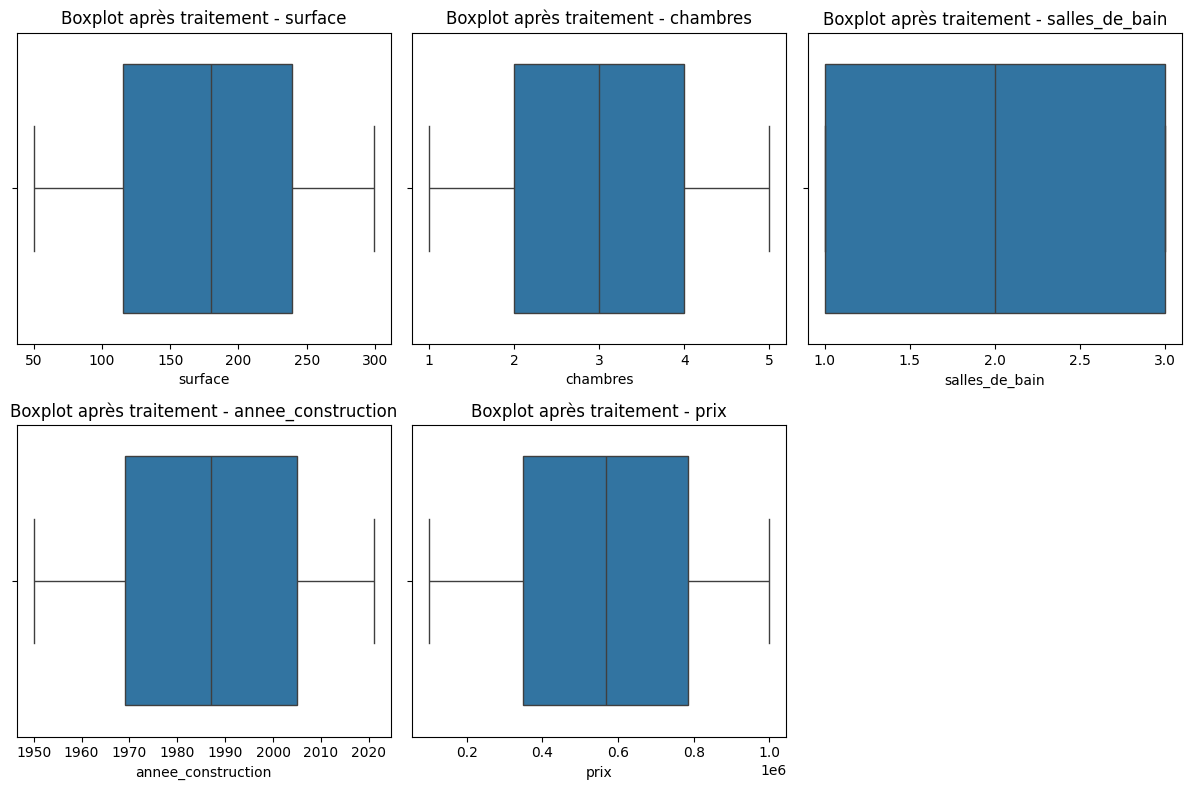

   surface  chambres  salles_de_bain quartier  annee_construction    prix
0      152         1               3        C                2001  361497
1      229         3               1        B                2019  689421
2      142         5               2        C                2004  821818
3       64         2               2        A                1982  479747
4      156         1               3        D                2011  258598
Dimensions du dataset après suppression des outliers: (1000, 6)


In [ ]:
# Suppression des valeurs aberrantes
data_cleaned = traiter_valeurs_aberrantes(data, colonnes_numeriques)

# Visualisation après le traitement des valeurs aberrantes (boxplots)
plt.figure(figsize=(12, 8))
for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(2, 3, i)  # Sous-graphique
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Boxplot après traitement - {col}')
plt.tight_layout()
plt.show()

# Affichage des premières lignes des données après traitement des valeurs aberrantes
print(data_cleaned.head())

# Vérification des dimensions du jeu de données après suppression des outliers
print(f"Dimensions du dataset après suppression des outliers: {data_cleaned.shape}")

In [ ]:
# 2. Encoder la variable catégorielle 'quartier' (utilisation de LabelEncoder ici pour l'exemple)
label_encoder = LabelEncoder()
data['quartier'] = label_encoder.fit_transform(data['quartier'])

# Affichage des données après encodage
print(data.head())

# 3. Normaliser les colonnes numériques (surface, chambres, salles de bain, année construction)
scaler = StandardScaler()
data[['surface', 'chambres', 'salles_de_bain', 'annee_construction']] = scaler.fit_transform(
    data[['surface', 'chambres', 'salles_de_bain', 'annee_construction']]
)

# Affichage des données après normalisation
print(data.head())

   surface  chambres  salles_de_bain  quartier  annee_construction    prix
0      152         1               3         2                2001  361497
1      229         3               1         1                2019  689421
2      142         5               2         2                2004  821818
3       64         2               2         0                1982  479747
4      156         1               3         3                2011  258598
    surface  chambres  salles_de_bain  quartier  annee_construction    prix
0 -0.370245 -1.371146        1.284629         2            0.710537  361497
1  0.705561  0.032997       -1.192959         1            1.586481  689421
2 -0.509960  1.437140        0.045835         2            0.856527  821818
3 -1.599736 -0.669074        0.045835         0           -0.214071  479747
4 -0.314359 -1.371146        1.284629         3            1.197172  258598


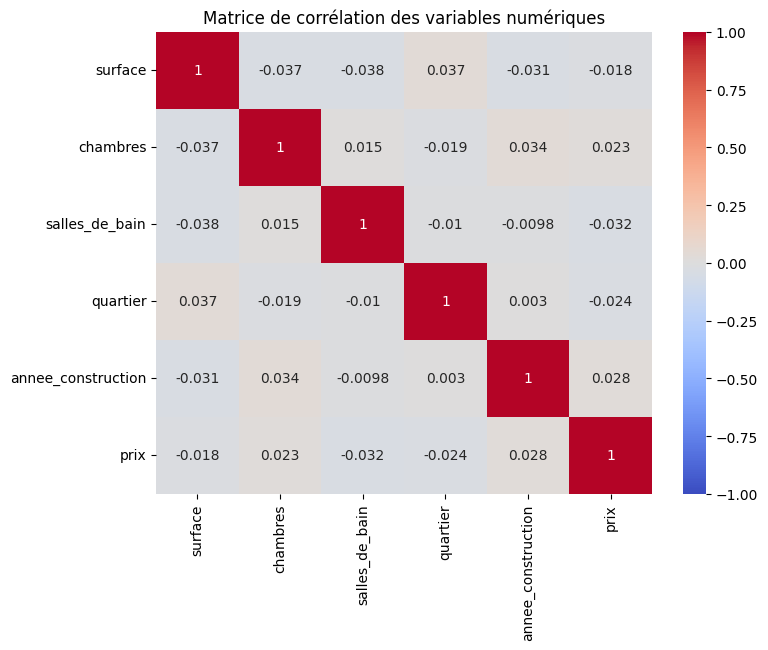

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Analyser les relations entre les caractéristiques et le prix
# Visualisation des relations entre les variables numériques et le prix

# Matrice de corrélation entre les variables numériques
corr_matrix = data.corr()

# Visualisation de la matrice de corrélation avec un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des variables numériques")
plt.show()

# Visualisations de la relation entre les caractéristiques et le prix (distribution, scatter plots)
plt.figure(figsize=(12, 8))

Text(0.5, 1.0, 'Surface vs Prix')

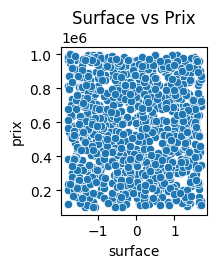

In [ ]:
# Surface vs Prix
plt.subplot(2, 3, 1)
sns.scatterplot(x=data['surface'], y=data['prix'])
plt.title('Surface vs Prix')

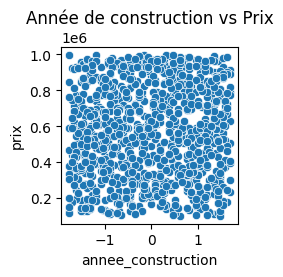

In [ ]:
# Année de construction vs Prix
plt.subplot(2, 3, 4)
sns.scatterplot(x=data['annee_construction'], y=data['prix'])
plt.title('Année de construction vs Prix')

plt.tight_layout()
plt.show()

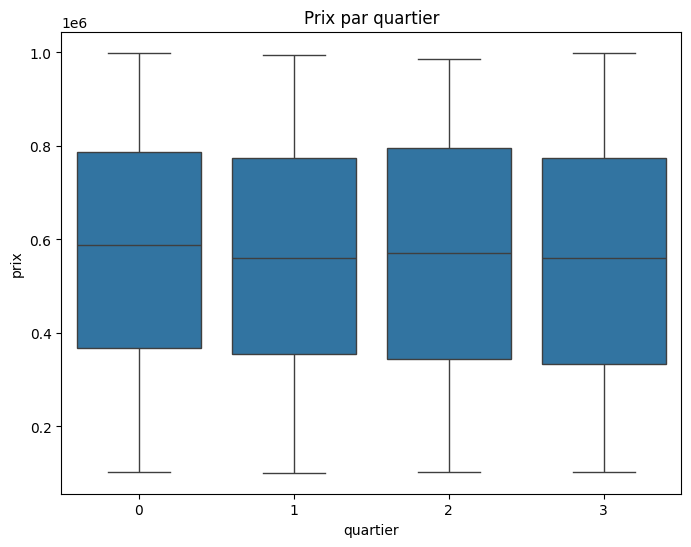

In [ ]:
# Analyse de la variable catégorielle 'quartier' et son influence sur le prix
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['quartier'], y=data['prix'])
plt.title("Prix par quartier")
plt.show()

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X = data.drop('prix', axis=1)  # Caractéristiques (sans la colonne cible 'prix')
y = data['prix']  # Variable cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions des ensembles d'entraînement et de test
print(f"Dimensions de X_train: {X_train.shape}, Dimensions de X_test: {X_test.shape}")

Dimensions de X_train: (800, 5), Dimensions de X_test: (200, 5)


In [ ]:
# Entraînement du modèle
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Importance des caractéristiques
feature_importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Affichage de l'importance des caractéristiques
print("Importance des caractéristiques :")
print(feature_importance)

Importance des caractéristiques :
                    Importance
surface               0.386303
annee_construction    0.325704
chambres              0.126992
quartier              0.111642
salles_de_bain        0.049359


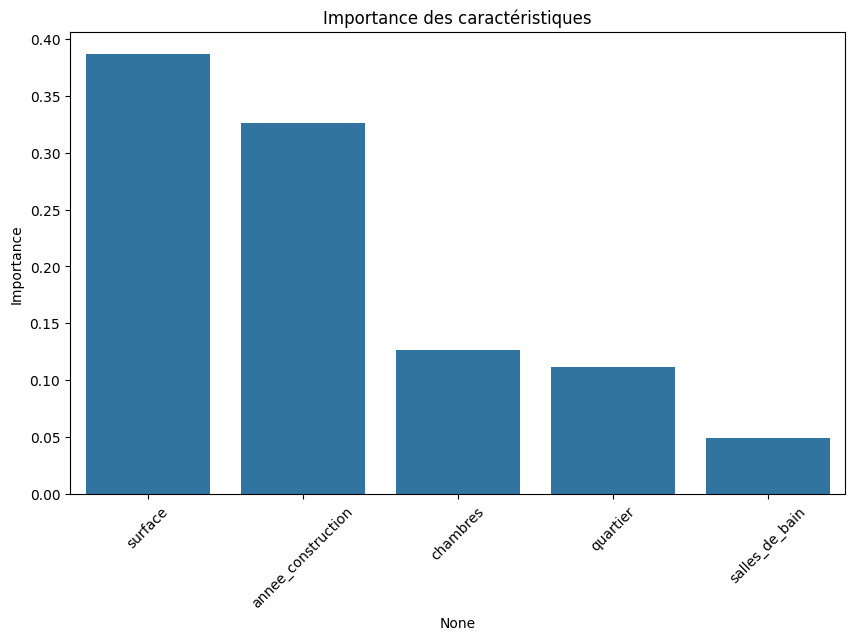

In [ ]:
# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.index, y=feature_importance['Importance'])
plt.title("Importance des caractéristiques")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Importation des modules nécessaires
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entraînement du modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_linear = linear_model.predict(X_test)

# Évaluation du modèle de régression linéaire
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calcul du RMSE
r2_linear = r2_score(y_test, y_pred_linear)

# Validation croisée pour évaluer les performances du modèle
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores négatifs pour obtenir le MSE
cv_scores = np.abs(cv_scores)

# Affichage des résultats de la validation croisée
print(f"Validation croisée (MSE) : {cv_scores}")
print(f"Moyenne du MSE de la validation croisée : {cv_scores.mean():.2f}")

# Affichage des résultats
print("Évaluation de la régression linéaire :")
print(f"Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R^2 Score: {r2_linear:.2f}")

# Validation croisée
print(f"Validation croisée RMSE (Moyenne): {cv_rmse.mean():.2f}")
print(f"Validation croisée RMSE (Écart-type): {cv_rmse.std():.2f}")

Validation croisée (MSE) : [5.67999544e+10 6.85718568e+10 6.78498038e+10 6.81185109e+10
 6.04827728e+10]
Moyenne du MSE de la validation croisée : 64364579743.06
Évaluation de la régression linéaire :
Mean Absolute Error (MAE): 217370.02
Mean Squared Error (MSE): 64974203182.51
Root Mean Squared Error (RMSE): 254900.38
R^2 Score: -0.03
Validation croisée RMSE (Moyenne): 253519.47
Validation croisée RMSE (Écart-type): 9615.61


In [ ]:
# Importation des modules nécessaires
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entraînement du modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_linear = linear_model.predict(X_test)

# Évaluation du modèle de régression linéaire
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calcul du RMSE
r2_linear = r2_score(y_test, y_pred_linear)

# Validation croisée pour évaluer les performances du modèle
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores négatifs pour obtenir le MSE
cv_scores = np.abs(cv_scores)

# Affichage des résultats de la validation croisée
print(f"Validation croisée (MSE) : {cv_scores}")
print(f"Moyenne du MSE de la validation croisée : {cv_scores.mean():.2f}")

# Affichage des résultats de l'évaluation du modèle optimisé
print("\nÉvaluation du modèle optimisé :")
print(f"Mean Absolute Error (MAE): {mae_optimized:.2f}")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f"R^2 Score: {r2_optimized:.2f}")

Validation croisée (MSE) : [5.67999544e+10 6.85718568e+10 6.78498038e+10 6.81185109e+10
 6.04827728e+10]
Moyenne du MSE de la validation croisée : 64364579743.06

Évaluation du modèle optimisé :
Mean Absolute Error (MAE): 217370.02
Mean Squared Error (MSE): 64974203182.51
Root Mean Squared Error (RMSE): 254900.38
R^2 Score: -0.03


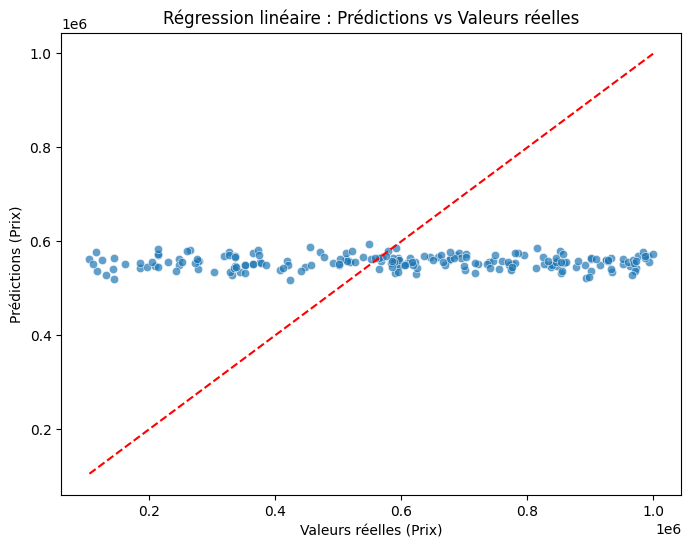

In [ ]:
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valeurs réelles (Prix)')
plt.ylabel('Prédictions (Prix)')
plt.title('Régression linéaire : Prédictions vs Valeurs réelles')
plt.show()


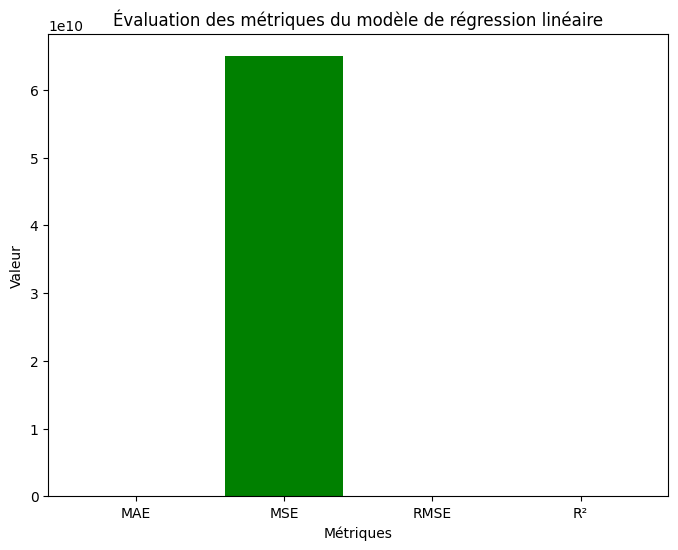

In [ ]:
# Importation des bibliothèques nécessaires pour la visualisation
import matplotlib.pyplot as plt
import numpy as np

# Calcul des métriques
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)  # Calcul du RMSE
r2_linear = r2_score(y_test, y_pred_linear)

# Liste des métriques et des valeurs
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
values = [mae_linear, mse_linear, rmse_linear, r2_linear]

# Création de la courbe des métriques
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])

# Ajouter des étiquettes et un titre
plt.xlabel('Métriques')
plt.ylabel('Valeur')
plt.title('Évaluation des métriques du modèle de régression linéaire')

# Affichage de la courbe
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Entraînement initial du modèle Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Prédictions
y_pred_ridge = ridge_model.predict(X_test)

# Calcul des métriques
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Affichage des résultats du modèle initial
print("Évaluation du modèle Ridge :")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R^2: {r2_ridge:.2f}")

# Validation croisée pour évaluer les performances du modèle Ridge
cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores négatifs pour obtenir le MSE
cv_scores = np.abs(cv_scores)

# Affichage des résultats de la validation croisée
print(f"\nValidation croisée (MSE) : {cv_scores}")
print(f"Moyenne du MSE de la validation croisée : {cv_scores.mean():.2f}")

# Optimisation des hyperparamètres avec GridSearch (pour alpha)
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}  # Valeurs possibles pour alpha

# GridSearch pour le modèle Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Meilleur modèle et évaluation
best_ridge_model = grid_search.best_estimator_
y_pred_best_ridge = best_ridge_model.predict(X_test)

# Calcul des métriques pour le modèle Ridge optimisé
mae_best_ridge = mean_absolute_error(y_test, y_pred_best_ridge)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)
rmse_best_ridge = np.sqrt(mse_best_ridge)
r2_best_ridge = r2_score(y_test, y_pred_best_ridge)

# Affichage des résultats pour le modèle Ridge optimisé
print("\nÉvaluation du modèle Ridge optimisé :")
print(f"MAE: {mae_best_ridge:.2f}")
print(f"MSE: {mse_best_ridge:.2f}")
print(f"RMSE: {rmse_best_ridge:.2f}")
print(f"R^2: {r2_best_ridge:.2f}")

# Affichage du meilleur paramètre pour Ridge
print(f"Meilleur paramètre pour alpha : {grid_search.best_params_}")


Évaluation du modèle Ridge :
MAE: 217369.58
MSE: 64973837746.50
RMSE: 254899.66
R^2: -0.03

Validation croisée (MSE) : [5.67994983e+10 6.85714064e+10 6.78470907e+10 6.81162949e+10
 6.04829835e+10]
Moyenne du MSE de la validation croisée : 64363454753.81

Évaluation du modèle Ridge optimisé :
MAE: 217293.26
MSE: 64873440142.62
RMSE: 254702.65
R^2: -0.03
Meilleur paramètre pour alpha : {'alpha': 1000}


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

# Entraînement du modèle Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Prédictions
y_pred_lasso = lasso_model.predict(X_test)

# Calcul des métriques
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Affichage des résultats du modèle Lasso
print("Évaluation du modèle Lasso :")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R^2: {r2_lasso:.2f}")

# Validation croisée pour évaluer les performances du modèle Lasso
cv_scores_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores négatifs pour obtenir le MSE
cv_scores_lasso = np.abs(cv_scores_lasso)

# Affichage des résultats de la validation croisée
print(f"\nValidation croisée (MSE) : {cv_scores_lasso}")
print(f"Moyenne du MSE de la validation croisée : {cv_scores_lasso.mean():.2f}")

# Optimisation des hyperparamètres avec GridSearch (pour alpha)
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Valeurs possibles pour alpha

# GridSearch pour le modèle Lasso
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Meilleur modèle et évaluation
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_best_lasso = best_lasso_model.predict(X_test)

# Calcul des métriques pour le modèle Lasso optimisé
mae_best_lasso = mean_absolute_error(y_test, y_pred_best_lasso)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)
rmse_best_lasso = np.sqrt(mse_best_lasso)
r2_best_lasso = r2_score(y_test, y_pred_best_lasso)

# Affichage des résultats pour le modèle Lasso optimisé
print("\nÉvaluation du modèle Lasso optimisé :")
print(f"MAE: {mae_best_lasso:.2f}")
print(f"MSE: {mse_best_lasso:.2f}")
print(f"RMSE: {rmse_best_lasso:.2f}")
print(f"R^2: {r2_best_lasso:.2f}")

# Affichage du meilleur paramètre pour Lasso
print(f"Meilleur paramètre pour alpha : {grid_search_lasso.best_params_}")


Évaluation du modèle Lasso :
MAE: 217370.00
MSE: 64974192166.89
RMSE: 254900.36
R^2: -0.03

Validation croisée (MSE) : [5.67999571e+10 6.85718530e+10 6.78497978e+10 6.81184944e+10
 6.04827773e+10]
Moyenne du MSE de la validation croisée : 64364575933.76

Évaluation du modèle Lasso optimisé :
MAE: 217357.87
MSE: 64963244025.40
RMSE: 254878.88
R^2: -0.03
Meilleur paramètre pour alpha : {'alpha': 100}


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Entraînement du modèle d'arbre de décision
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Calcul des métriques
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Affichage des résultats du modèle arbre de décision
print("Évaluation du modèle Arbre de Décision :")
print(f"MAE: {mae_tree:.2f}")
print(f"MSE: {mse_tree:.2f}")
print(f"RMSE: {rmse_tree:.2f}")
print(f"R^2: {r2_tree:.2f}")

# Validation croisée pour évaluer les performances du modèle d'arbre de décision
cv_scores_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores négatifs pour obtenir le MSE
cv_scores_tree = np.abs(cv_scores_tree)

# Affichage des résultats de la validation croisée
print(f"\nValidation croisée (MSE) : {cv_scores_tree}")
print(f"Moyenne du MSE de la validation croisée : {cv_scores_tree.mean():.2f}")

# Optimisation des hyperparamètres avec GridSearch (pour max_depth et min_samples_leaf)
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, None],  # Valeurs possibles pour la profondeur de l'arbre
    'min_samples_leaf': [1, 2, 4, 8]   # Valeurs possibles pour le nombre minimal d'échantillons par feuille
}

# GridSearch pour le modèle d'arbre de décision
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_tree.fit(X_train, y_train)

# Meilleur modèle et évaluation
best_tree_model = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test)

# Calcul des métriques pour le modèle d'arbre de décision optimisé
mae_best_tree = mean_absolute_error(y_test, y_pred_best_tree)
mse_best_tree = mean_squared_error(y_test, y_pred_best_tree)
rmse_best_tree = np.sqrt(mse_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)

# Affichage des résultats pour le modèle d'arbre de décision optimisé
print("\nÉvaluation du modèle Arbre de Décision optimisé :")
print(f"MAE: {mae_best_tree:.2f}")
print(f"MSE: {mse_best_tree:.2f}")
print(f"RMSE: {rmse_best_tree:.2f}")
print(f"R^2: {r2_best_tree:.2f}")

# Affichage du meilleur paramètre pour l'arbre de décision
print(f"Meilleur paramètre pour l'arbre de décision : {grid_search_tree.best_params_}")


Évaluation du modèle Arbre de Décision :
MAE: 320158.97
MSE: 148261501543.86
RMSE: 385047.40
R^2: -1.35

Validation croisée (MSE) : [1.43095385e+11 1.21374714e+11 1.08851108e+11 1.43628910e+11
 1.44461087e+11]
Moyenne du MSE de la validation croisée : 132282240853.78

Évaluation du modèle Arbre de Décision optimisé :
MAE: 221929.00
MSE: 69363648694.86
RMSE: 263369.79
R^2: -0.10
Meilleur paramètre pour l'arbre de décision : {'max_depth': 3, 'min_samples_leaf': 1}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Entraînement du modèle de forêt aléatoire
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Prédictions
y_pred_forest = forest_model.predict(X_test)

# Calcul des métriques
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Affichage des résultats
print("Évaluation du modèle Forêt Aléatoire :")
print(f"MAE: {mae_forest:.2f}")
print(f"MSE: {mse_forest:.2f}")
print(f"RMSE: {rmse_forest:.2f}")
print(f"R^2: {r2_forest:.2f}")

# Validation croisée pour évaluer les performances du modèle de forêt aléatoire
cv_scores_forest = cross_val_score(forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Conversion des scores négatifs pour obtenir le MSE
cv_scores_forest = np.abs(cv_scores_forest)

# Affichage des résultats de la validation croisée
print(f"\nValidation croisée (MSE) : {cv_scores_forest}")
print(f"Moyenne du MSE de la validation croisée : {cv_scores_forest.mean():.2f}")

# Optimisation des hyperparamètres avec GridSearch (pour n_estimators et max_depth)
param_grid_forest = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons requis pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]     # Nombre minimal d'échantillons requis pour être à une feuille
}

# GridSearch pour le modèle de forêt aléatoire
grid_search_forest = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_forest, cv=5, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

# Meilleur modèle et évaluation
best_forest_model = grid_search_forest.best_estimator_
y_pred_best_forest = best_forest_model.predict(X_test)

# Calcul des métriques pour le modèle de forêt aléatoire optimisé
mae_best_forest = mean_absolute_error(y_test, y_pred_best_forest)
mse_best_forest = mean_squared_error(y_test, y_pred_best_forest)
rmse_best_forest = np.sqrt(mse_best_forest)
r2_best_forest = r2_score(y_test, y_pred_best_forest)

# Affichage des résultats pour le modèle de forêt aléatoire optimisé
print("\nÉvaluation du modèle Forêt Aléatoire optimisé :")
print(f"MAE: {mae_best_forest:.2f}")
print(f"MSE: {mse_best_forest:.2f}")
print(f"RMSE: {rmse_best_forest:.2f}")
print(f"R^2: {r2_best_forest:.2f}")

# Affichage du meilleur paramètre pour la forêt aléatoire
print(f"Meilleur paramètre pour la forêt aléatoire : {grid_search_forest.best_params_}")



Évaluation du modèle Forêt Aléatoire :
MAE: 240307.21
MSE: 78005032431.81
RMSE: 279293.81
R^2: -0.23

Validation croisée (MSE) : [6.64699996e+10 7.34204166e+10 6.95326794e+10 7.71110975e+10
 6.81498646e+10]
Moyenne du MSE de la validation croisée : 70936811541.13

Évaluation du modèle Forêt Aléatoire optimisé :
MAE: 226441.96
MSE: 71029460493.23
RMSE: 266513.53
R^2: -0.12
Meilleur paramètre pour la forêt aléatoire : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation du modèle XGBoost
xgb_model = xgb.XGBRegressor()

# Validation croisée pour évaluer le modèle
cv_score_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcul du MSE moyen sur la validation croisée (en prenant le négatif pour obtenir un MSE positif)
mse_cv_xgb = np.mean(-cv_score_xgb)  # Prendre le négatif pour obtenir le MSE

# Entraînement du modèle sur l'ensemble de données d'entraînement
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_xgb = xgb_model.predict(X_test)

# Calcul des métriques d'évaluation sur l'ensemble de test
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)  # Erreur absolue moyenne
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Racine carrée de l'erreur quadratique moyenne
r2_xgb = r2_score(y_test, y_pred_xgb)  # Coefficient de détermination

# Affichage des résultats
print("XGBoost :")
print(f"Validation croisée MSE : {mse_cv_xgb:.2f}")
print(f"MAE : {mae_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R² : {r2_xgb:.2f}")

XGBoost :
Validation croisée MSE : 88944289755.39
MAE : 271604.87
RMSE : 313473.36
R² : -0.56


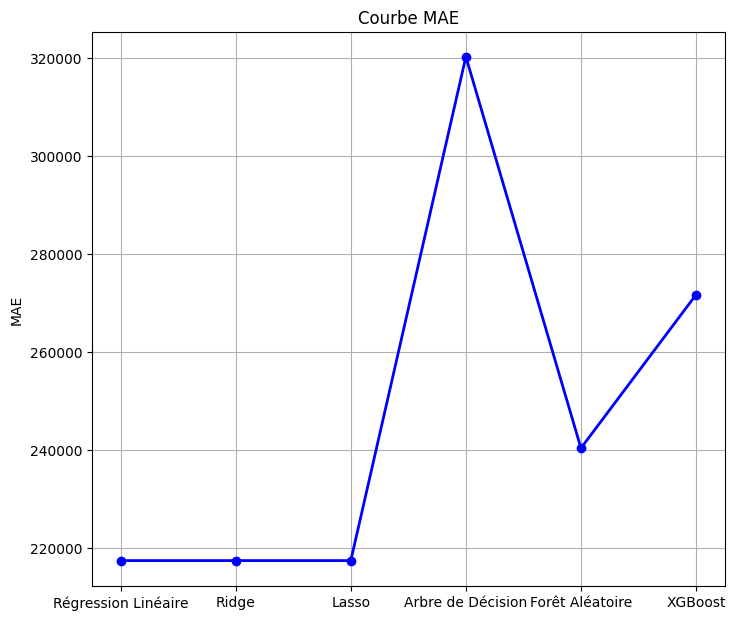

In [ ]:
import matplotlib.pyplot as plt

# Définition des labels et des scores des différents modèles
labels = ['Régression Linéaire', 'Ridge', 'Lasso', 'Arbre de Décision', 'Forêt Aléatoire', 'XGBoost']
mae_scores = [mae_linear, mae_ridge, mae_lasso, mae_tree, mae_forest, mae_xgb]
mse_scores = [mse_linear, mse_ridge, mse_lasso, mse_tree, mse_forest, mse_xgb]
rmse_scores = [rmse_linear, rmse_ridge, rmse_lasso, rmse_tree, rmse_forest, rmse_xgb]
r2_scores = [r2_linear, r2_ridge, r2_lasso, r2_tree, r2_forest, r2_xgb]

# Créer une figure avec des sous-graphiques
plt.figure(figsize=(14, 12))

# MAE
plt.subplot(2, 2, 1)
plt.plot(labels, mae_scores, marker='o', color='blue', label='MAE', linestyle='-', linewidth=2)
plt.title("Courbe MAE")
plt.ylabel("MAE")
plt.grid(True)

# Ajuster l'affichage des graphiques
plt.tight_layout()

# Afficher les courbes
plt.show()


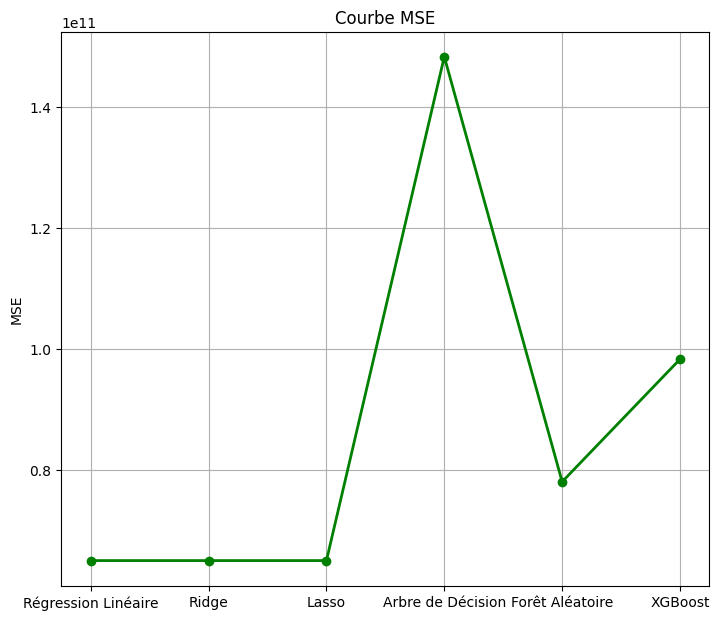

In [ ]:
# Créer une figure avec des sous-graphiques
plt.figure(figsize=(14, 12))

# MSE
plt.subplot(2, 2, 2)
plt.plot(labels, mse_scores, marker='o', color='green', label='MSE', linestyle='-', linewidth=2)
plt.title("Courbe MSE")
plt.ylabel("MSE")
plt.grid(True)

# Ajuster l'affichage des graphiques
plt.tight_layout()

# Afficher les courbes
plt.show()

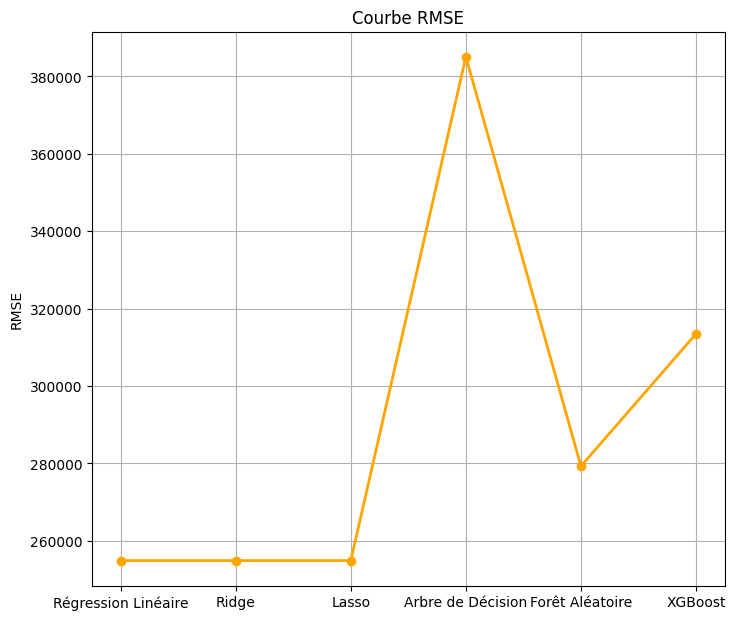

In [ ]:
# Créer une figure avec des sous-graphiques
plt.figure(figsize=(14, 12))

# RMSE
plt.subplot(2, 2, 3)
plt.plot(labels, rmse_scores, marker='o', color='orange', label='RMSE', linestyle='-', linewidth=2)
plt.title("Courbe RMSE")
plt.ylabel("RMSE")
plt.grid(True)

# Ajuster l'affichage des graphiques
plt.tight_layout()

# Afficher les courbes
plt.show()

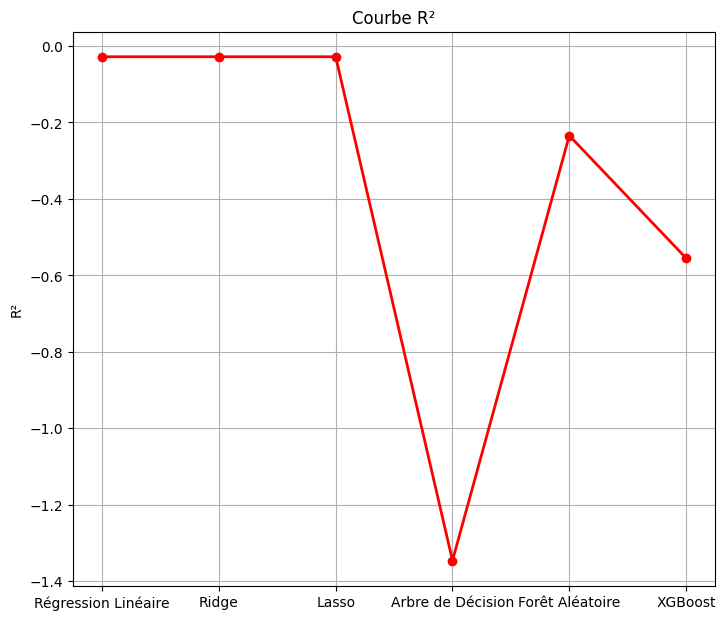

In [ ]:
# Créer une figure avec des sous-graphiques
plt.figure(figsize=(14, 12))

# R²
plt.subplot(2, 2, 4)
plt.plot(labels, r2_scores, marker='o', color='red', label='R²', linestyle='-', linewidth=2)
plt.title("Courbe R²")
plt.ylabel("R²")
plt.grid(True)

# Ajuster l'affichage des graphiques
plt.tight_layout()

# Afficher les courbes
plt.show()

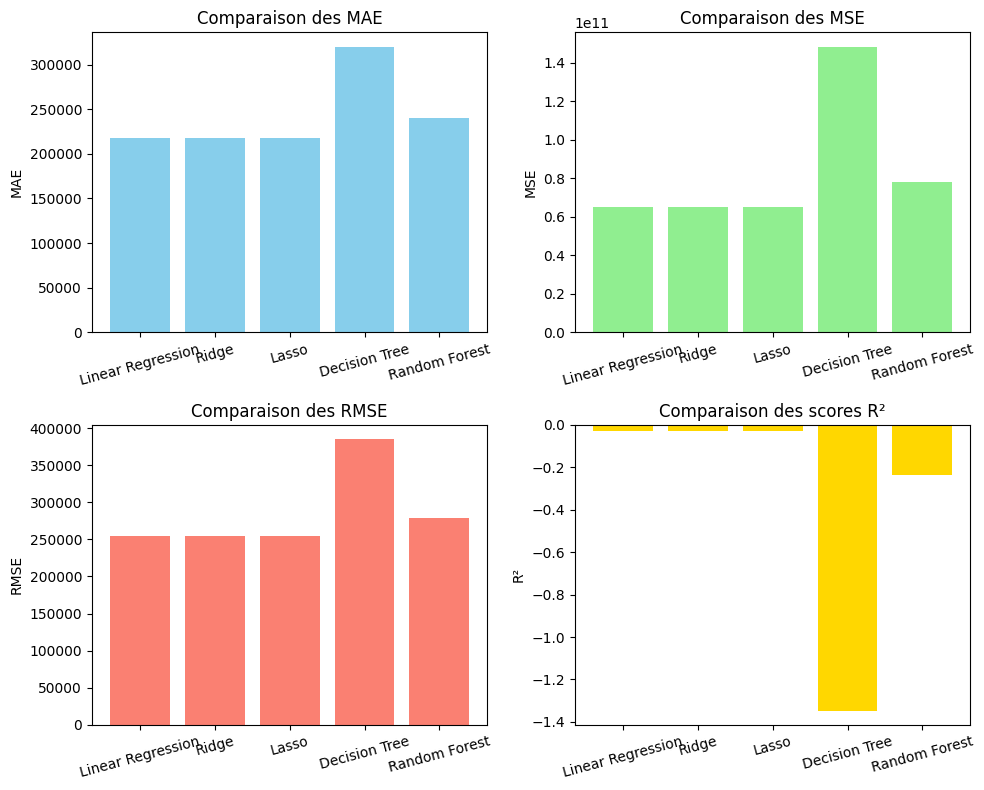

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des modèles et des métriques calculées
models = ['Linear Regression', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest']
mae_values = [mae_linear, mae_ridge, mae_lasso, mae_tree, mae_forest]
mse_values = [mse_linear, mse_ridge, mse_lasso, mse_tree, mse_forest]
rmse_values = [rmse_linear, rmse_ridge, rmse_lasso, rmse_tree, rmse_forest]
r2_values = [r2_linear, r2_ridge, r2_lasso, r2_tree, r2_forest]

# Création de la figure pour les sous-graphiques
plt.figure(figsize=(10, 8))

# Sous-graphe pour MAE
plt.subplot(2, 2, 1)
plt.bar(models, mae_values, color='skyblue')
plt.title('Comparaison des MAE')
plt.ylabel('MAE')
plt.xticks(rotation=15)

# Sous-graphe pour MSE
plt.subplot(2, 2, 2)
plt.bar(models, mse_values, color='lightgreen')
plt.title('Comparaison des MSE')
plt.ylabel('MSE')
plt.xticks(rotation=15)

# Sous-graphe pour RMSE
plt.subplot(2, 2, 3)
plt.bar(models, rmse_values, color='salmon')
plt.title('Comparaison des RMSE')
plt.ylabel('RMSE')
plt.xticks(rotation=15)

# Sous-graphe pour R²
plt.subplot(2, 2, 4)
plt.bar(models, r2_values, color='gold')
plt.title('Comparaison des scores R²')
plt.ylabel('R²')
plt.xticks(rotation=15)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()


In [ ]:
import pickle
from sklearn.tree import DecisionTreeRegressor

# Supposons que 'model' soit votre arbre de décision entraîné
model = DecisionTreeRegressor()
# Entraînez votre modèle avec vos données ici (par exemple: model.fit(X_train, y_train))

# Sauvegarde du modèle dans un fichier .pkl
with open('decision_tree_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Modèle sauvegardé avec succès!")


Modèle sauvegardé avec succès!


In [ ]:
pip install flask

In [ ]:
from flask import Flask, request, jsonify
import pickle

# Initialiser l'application Flask
app = Flask(__name__)

# Charger le modèle sauvegardé
with open('/content/decision_tree_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

@app.route('/predict', methods=['POST'])
def predict():
    # Récupérer les données envoyées en JSON
    data = request.get_json()

    # Supposons que les données envoyées soient sous forme d'une liste de caractéristiques
    features = data['features']

    # Effectuer la prédiction
    prediction = model.predict([features])

    # Retourner la prédiction en format JSON
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    # Lancer le serveur Flask
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [1]:
!jupyter nbconvert --to html /content/Matoussi_Ranim.ipynb

[NbConvertApp] Converting notebook /content/Matoussi_Ranim.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 1135814 bytes to /content/Matoussi_Ranim.html
